## Alice spring: 2016, 2017, 2018 

In [1]:
#! pip install SALIb

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np


In [3]:
### running SAlib example:

In [4]:
from IPython.display import HTML, display
from sympy import diff, init_printing
import argparse
import csv
init_printing() 
init_printing(use_latex='mathjax')  # This causes mathjax to render all output
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

!pip install statsmodels

In [6]:
from sys import stdout       # For printing progress of computations
import numpy as np
import pandas as pd
import scipy as sc
import glob
import statsmodels.api as sm
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
from sklearn import metrics
import calendar
from sympy.printing.theanocode import theano_function

In [7]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
from itertools import chain



In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
import xarray as xr
from sympy.physics.units import convert_to
#import matplotlib
#from matplotlib import rc
import numpy as np
from pandas import Timestamp
from essm import Eq, e
from essm.equations import Equation
from essm.variables import Variable
from essm.variables.utils import generate_metadata_table
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt 

In [10]:
import glob
from netCDF4 import Dataset
import os

filelist = ['arr[0]', 'arr[1]', 'arr[2]']
ncfile = xr.open_mfdataset(filelist)

In [11]:
path = '../Data/tern/AS' 
#print(path)
    
ncfile = xr.open_mfdataset(path +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray v

In [12]:
HWframe= ncfile.to_dataframe()
HWframe.index=HWframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
HWframe.reset_index(inplace=True)
HWframe.index=HWframe.time 
HWframe=HWframe[(HWframe.Ws_QCFlag==00)&(HWframe.Fld_QCFlag==00)&(HWframe.Flu_QCFlag==00)&(HWframe.Fh_QCFlag==00)
               &(HWframe.Ta_QCFlag==00)]
HWframe=HWframe.replace(-9999.000000, np.nan)
HWframe["T_a"] = pd.Series(HWframe.Ta + 273.15, index=HWframe.index)

In [13]:
plt_path= '../Plots'

### prec:

In [14]:
df_prec=HWframe[['Precip']]
df_prec1=df_prec.resample('D').sum()
#df_prec1

### data in pandas series

In [15]:
airtemp = HWframe['Ta']


In [16]:
HWframe=HWframe.replace(-9999.000000, np.nan)

## SEB correction

In [17]:
Beta = (HWframe.Fh)/(HWframe.Fe)
HWframe["beta"] = Beta

dLE=(HWframe.Fn - HWframe.Fg - (1+ HWframe.beta)*HWframe.Fe)/(1+ HWframe.beta)
HWframe["dLE"] = dLE
HWframe["Fe_corr"] = HWframe.dLE + HWframe.Fe
HWframe["dH"] = (HWframe.dLE + HWframe.Fe)* Beta - HWframe.Fh
HWframe["Fh_corr"] = HWframe.Fh + HWframe.dH

#dH=

## variables :

In [18]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9
class eps_r (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{r}'
    #default = 0.9
class eps_b (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{b}'
    #default = 0.9
        
    
    
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.67 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

In [19]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

                         4    
Rₗₒᵤₜ = Rₗᵢₙ⋅(1 - ε) + Tₛ ⋅ε⋅σ

In [20]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

         _____________________
        ╱ Rₗᵢₙ   Rₗᵢₙ   Rₗₒᵤₜ 
Tₛ = 4 ╱  ──── - ──── + ───── 
     ╲╱    σ     ε⋅σ     ε⋅σ  

tf_Ts = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
list_Ts = tf_Ts(HWframe.Flu,HWframe.Fld)
print(list_Ts)


## surface temperature calculation: ignoring reflected / SBlaw

In [21]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


          4    
Rₗₒᵤₜ = Tₛ ⋅ε⋅σ

In [22]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

         _______
        ╱ Rₗₒᵤₜ 
Tₛ = 4 ╱  ───── 
     ╲╱    ε⋅σ  

## plots:

In [23]:
def Ts_boxplt_modeps (df_all,year):    #days,hours):
    """Plot a panel per month with H and delT."""
    #df_all = Asframe.copy()
    con_month=[]
    ign_month=[]
    for i in range(12):
        list_months = list(range(1,13))
        df = df_all[(df_all.index.year == year) & (df_all.index.month == list_months[i]) &  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                    #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                    #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
        epsilon1=0.97
        epsilon_mod=0.97
        
        
        ign_rad=[]
        con_rad=[]
            
            
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                                       
            
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
            #####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        
        ign_rad.append(df.T_s1)
        con_rad.append(df.T_s)
            
            #my_con1=np.ravel(con_rad)
            #print(len(my_con1))
        my_con2=np.ravel(con_rad)
        my_ign2=np.ravel(ign_rad)
        
            #monthsdata= pd.DataFrame(columns=["months", "Ts"])
        con_month.append(my_con2)
        ign_month.append(my_ign2)
       
       
    box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
             con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True,
               positions=np.arange(0.75,12.75))
    box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
             ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
    plt.setp(box1["boxes"], facecolor='orange')
    plt.setp(box["boxes"], facecolor='blue')
    plt.ylim(273, 335)
    plt.xticks(np.arange(1,13), ('0','1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.ylabel('Temperature (K)', ha='center',fontsize=20)
    plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
   
    #plt.ylim(min(y), max(y))
    plt.legend([box["boxes"][0],box1["boxes"][0]],["considering relected component", "ignoring relected component"],loc="upper left")         
    plt.title('{0},$\epsilon_mod$={1}'.format(df.index[0].date().strftime('%Y'), 
                                               str(np.round(epsilon_mod,decimals=3))))
                                               
                                                #str(np.round(epsilon2,decimals=3))))
    plt.grid()
    plt.show()

   
    

### Ts and TS1 box plot for eps range:

### for modis eps

In [24]:
class epsilon_mod (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon_{modis}'
    #default = 0.9

In [25]:
#generate_metadata_table([])

## opt eps using OLS: considering reflected

plt_path= '/home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/plots/'

In [26]:
opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
def opteps_OLS_loop (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', 
                     eqdigits=3, epsmin=0.7, epsmax=0.999, epsincr=0.002):
    
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
       
        
        list_T_s = tf_T_s((df.Fld),(df.Flu)) # both longwave are overestimated by 5 watt/m2
        
        df = df.assign(T_s=list_T_s)
        #ycol = (df.Fh +30  )
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a))
        ####
       
        #####
        df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
            opteps_As_ref.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As_ref.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
    
    df_eps_ref=opteps_As_ref.copy()
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
   
    return df_eps_ref.eps_ref.iloc[0]
        

In [27]:
opteps_OLS_loop (2017, HWframe,10)

0.8220000000000001

### opt eps plot

In [28]:
def opteps_OLS_months2 (years, df,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3,):
    
    df_all = HWframe.copy()
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
        &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
   
        
        
    list_T_s = tf_T_s(df.Fld, df.Flu ) # both longwave are underestimated by 5 watt/m2
   
    df = df.assign(T_s=list_T_s)
    #list_H = (df.Fh  30)
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
   
        #####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
        
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))
    #plt.plot(df12.DT2,df12.fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.xticks([-5,0,5,10,15])
    
    plt.xlim(0, 15)
    plt.ylim(0, 500)
        
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

41.925461390195515


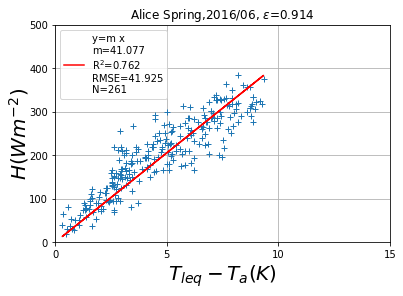

41.925461390195515


In [29]:
opteps_OLS_months2( 2016,HWframe,6,0.914)

54.73505240124359


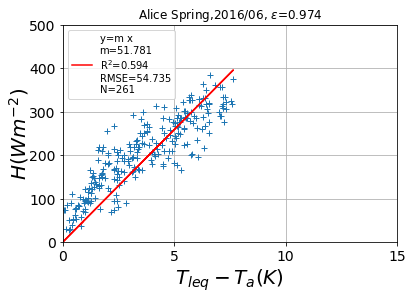

54.73505240124359


In [30]:
opteps_OLS_months2( 2016,HWframe,6,0.974)

## Yearly epsilon:

52.34964711654415


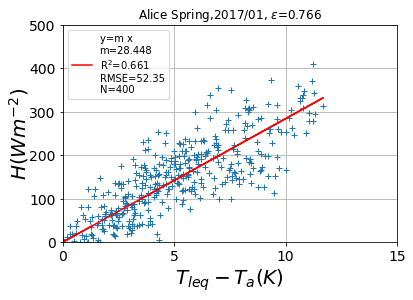

52.34964711654415
44.50695742844667


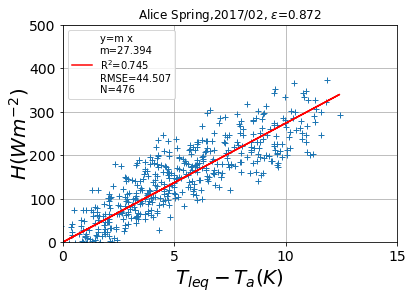

44.50695742844667
43.62101759806042


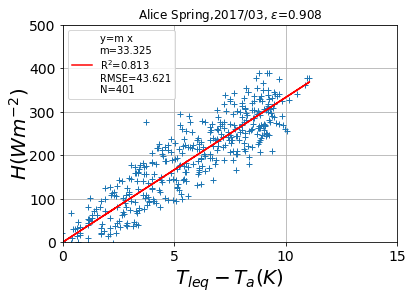

43.62101759806042
48.78798623883036


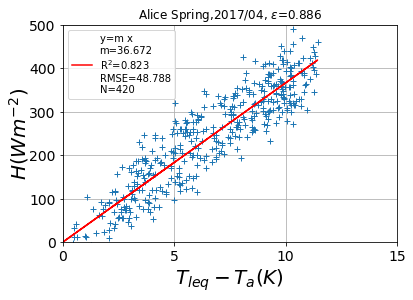

48.78798623883036
47.11366455111613


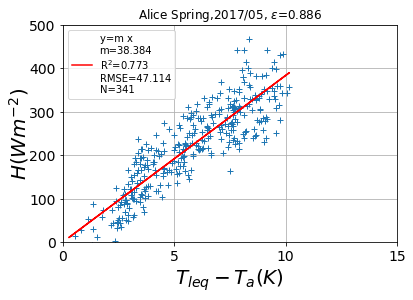

47.11366455111613
42.12454589930604


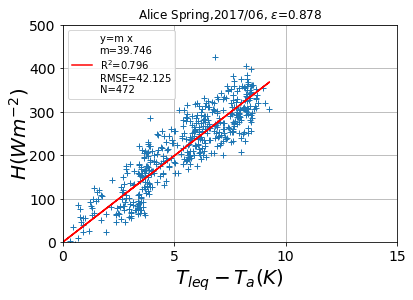

42.12454589930604
39.09832652413563


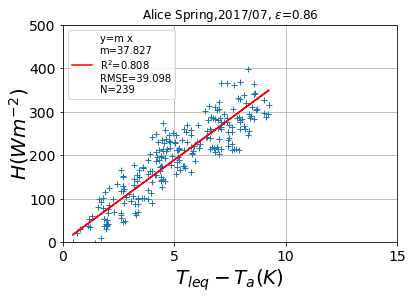

39.09832652413563
40.8734933249031


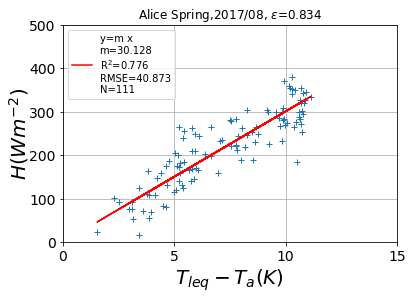

40.8734933249031
53.38824703105006


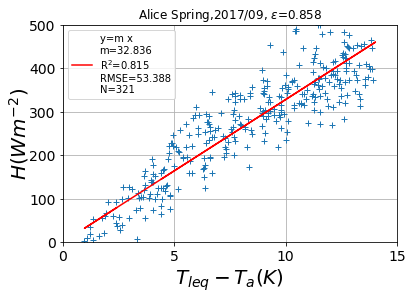

53.38824703105006
67.97089267631475


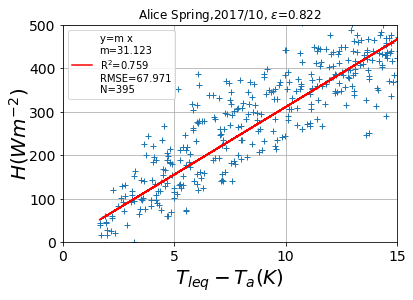

67.97089267631475
58.61741649085814


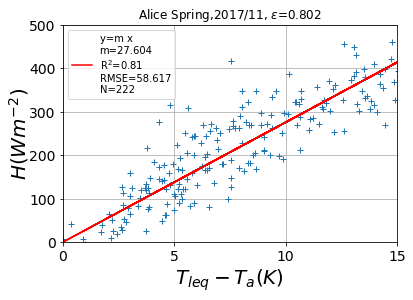

58.61741649085814
58.6792340688723


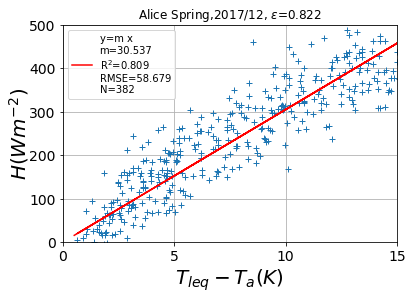

58.6792340688723


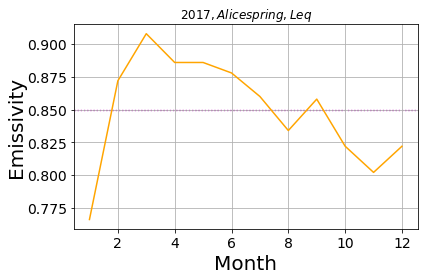

In [32]:
yr=2017
mnth=0
list_opt_epsref1=[]
for i in range(12):
    mnth=i+1
    opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    opt_eps = opteps_OLS_loop(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsref1.append(opt_eps)
        opteps_OLS_months2(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsref1.append(1)
    
const=np.mean(list_opt_epsref1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsref1,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Leq$'.format(str(np.round(yr)))
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
#plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
from random import seed
from random import sample
from numpy.random import randint
import random

## reading  sobol txt file:

In [ ]:
#filename='/home/thakur_21505/lst-retrival-from-fluxnet-data/notebook/sobl_analyse_As.txt'
#open(filename, "r")

In [ ]:
#Si['S2'][0,1]

In [ ]:
#Si['S1'][0,2]
#Si['ST'][0,2]
#Si['S2'][0,2]


### uncertainity  analysis for 2018: eps from 1 to 0.2
after stans commenton the issue https://git.list.lu/wave/lst-retrival-from-fluxnet-data/-/issues/10

In [ ]:
#opteps_loop_salib2 (2017,HWframe,3,-15,5,0.5)

opteps_flux_unc= pd.DataFrame(columns=["year", "month","unc_flu","unc_ta","eps"])

months=10 
year=2017 
jj=0 
#k in range(0,12):

problem = {
       'num_vars': 1,
       'names': [ 'dFlu',],
       'bounds': [[-5,5],
                ]
    }
param_values = saltelli.sample(problem, 100, calc_second_order=True)
eps = np.zeros([param_values.shape[0]])
for i in range(0,len(param_values)):
    #unc_H=param_values[i,0]
    #unc_Fld=param_values[i,1]
    unc_Flu=param_values[i,0]
    #unc_Ta=param_values[i,3]
    eps[i]=opteps_loop_salib21 (HWframe,2017,10,unc_Flu)
    opteps_flux_unc.loc[jj]=[year,months,unc_Flu,eps[i]]
    jj=jj+1
#with open("sobl_analyse_.txt","a") as file :
#outfile = open("sobl_analyse_As.txt", mode="a")# to append 
#outfile.write("%s,%s,%s,%s,%s,%s\n" %("S1","S1_conf", "ST", "ST_conf","S2", "S2_conf"))

    #Si = sobol.analyze(problem, eps,print_to_console=True) 


opteps_flux_error= pd.DataFrame(columns=["year", "month","unc_h","unc_flu","unc_ta","eps"])
sobol_index= pd.DataFrame(columns=["Param", "S1","S1_conf","ST","ST_conf",
                                  "dhS2","dfluS2","dTaS2","dhS2_conf","dfluS2_conf","dTaS2_conf","month"])
months=(np.arange(1,13))
year=2017
jj=0
kk=0
for k in range(0,12):
    
    problem = {
           'num_vars': 3,
           'names': ['dFh', 'dFlu','dTa'],
           'bounds': [[-20,20],
               [-5,5],
               [-1,1]      ]
        }
    param_values = saltelli.sample(problem, 100, calc_second_order=True)
    eps = np.zeros([param_values.shape[0]])
    for i in range(0,len(param_values)):
        unc_H=param_values[i,0]
        #unc_Fld=param_values[i,1]
        unc_Flu=param_values[i,1]
        unc_Ta=param_values[i,2]
        eps[i]=opteps_loop_salib2(2017,HWframe,months[k],unc_H,unc_Flu,unc_Ta)
        opteps_flux_error.loc[jj]=[year,months[k],unc_H,unc_Flu,unc_Ta,eps[i]]
        jj=jj+1
        

    
    Si = sobol.analyze(problem, eps,print_to_console=True)
    Param=['dh','dflu','dta']
    sobol_index.loc[0+(3*kk)]=[Param[0], Si['S1'][0],Si['S1_conf'][0],Si['ST'][0],Si['ST_conf'][0],np.nan,Si['S2'][0,1],
                              Si['S2'][0,2],
                              np.nan,Si['S2_conf'][0,1],
                              Si['S2_conf'][0,2],months[k]]
    sobol_index.loc[1+(3*kk)]=[Param[1], Si['S1'][1],Si['S1_conf'][1],Si['ST'][1],Si['ST_conf'][1],np.nan,np.nan,Si['S2'][1,2],
                               np.nan,np.nan,Si['S2_conf'][1,2],months[k]]
    sobol_index.loc[2+(3*kk)]=[Param[2], Si['S1'][2],Si['S1_conf'][2],Si['ST'][2],Si['ST_conf'][2],np.nan,np.nan,np.nan,
                            np.nan,np.nan,np.nan,months[k]]                          
    kk=kk+1
        
                               


In [ ]:
#opteps_flux_error.to_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_corr_seq.csv')

## opt eps box plot leq

In [33]:
flux_unc=pd.read_csv('../output/salib_AS_leq.csv')

In [34]:
flux_unc.eps

0        0.780
1        0.774
2        0.756
3        0.712
4        0.750
         ...  
11995    0.836
11996    0.802
11997    0.848
11998    0.794
11999    0.800
Name: eps, Length: 12000, dtype: float64

In [35]:
dt_unc1=flux_unc.eps.copy()
opteps_1=np.array(dt_unc1[0:1000])
opteps_2=np.array(dt_unc1[1000:2000])
opteps_3=np.array(dt_unc1[2000:3000])
opteps_4=np.array(dt_unc1[3000:4000])
opteps_5=np.array(dt_unc1[4000:5000])
opteps_6=np.array(dt_unc1[5000:6000])
opteps_7=np.array(dt_unc1[6000:7000])
opteps_8=np.array(dt_unc1[7000:8000])
opteps_9=np.array(dt_unc1[8000:9000])
opteps_10=np.array(dt_unc1[9000:10000])
opteps_11=np.array(dt_unc1[10000:11000])
opteps_12=np.array(dt_unc1[11000:12000])





## opt eps box plot seq

In [38]:
flux_unc_seq=pd.read_csv('../output/salib_AS_corr_seq.csv')

In [39]:
dt_unc_seq=flux_unc_seq.eps.copy()
opteps1_1=np.array(dt_unc_seq[0:800])
opteps1_2=np.array(dt_unc_seq[800:1600])
opteps1_3=np.array(dt_unc_seq[1600:2400])
opteps1_4=np.array(dt_unc_seq[2400:3200])
opteps1_5=np.array(dt_unc_seq[3200:4000])
opteps1_6=np.array(dt_unc_seq[4000:4800])
opteps1_7=np.array(dt_unc_seq[4800:5600])
opteps1_8=np.array(dt_unc_seq[5600:6400])
opteps1_9=np.array(dt_unc_seq[6400:7200])
opteps1_10=np.array(dt_unc_seq[7200:8000])
opteps1_11=np.array(dt_unc_seq[8000:8800])
opteps1_12=np.array(dt_unc_seq[8800:9600])





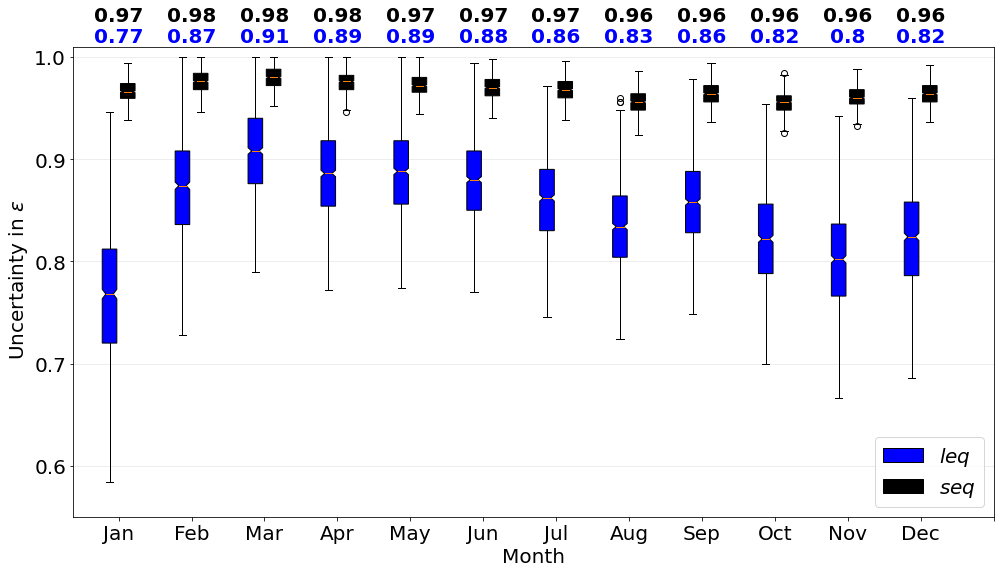

In [61]:
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.boxplot([opteps_1.flatten(),opteps_2.flatten(),opteps_3.flatten(),opteps_4.flatten(),opteps_5.flatten(),
                 opteps_6.flatten(),opteps_7.flatten(),opteps_8.flatten(),opteps_9.flatten(),
                 opteps_10.flatten(),opteps_11.flatten(),opteps_12.flatten()],1,widths=0.2,patch_artist=True,
                positions=np.arange(0.5,12.50))
### box plot using short equation
box1=plt.boxplot([opteps1_1.flatten(),opteps1_2.flatten(),opteps1_3.flatten(),opteps1_4.flatten(),opteps1_5.flatten(),
                  opteps1_6.flatten(),opteps1_7.flatten(),opteps1_8.flatten(),opteps1_9.flatten(),opteps1_10.flatten(),
                  opteps1_11.flatten(),opteps1_12.flatten()]
                 ,1,widths=0.2,patch_artist=True,
                 positions=np.arange(0.75,12.75))
               
               
               
               
plt.setp(box["boxes"], facecolor='blue')
plt.setp(box1["boxes"], facecolor='black')
plt.legend([box["boxes"][0],box1["boxes"][0]],
           ["$leq$", "$seq$"],loc="lower right", fontsize=20) 
#line1,=plt.plot(np.arange(0.5,12.5),list_opt_epsref1, color='r', label='optimum epsilon using Leq',zorder=10)
#line2,=plt.plot(np.arange(0.75,12.75),list_opt_epsign1, color='g', label='optimum epsilon using Seq',zorder=10)

#plt.legend([box["boxes"][0],box1["boxes"][0],line1, line2],["Leq with flux uncertainty", "Seq with flux uncertainty"],
           #loc="lower right")    

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_ylabel(" Uncertainty in $\epsilon$", ha='center',fontsize=20)
ax1.set_xlabel('Month', ha='center',fontsize=20)
numBoxes=12
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]
    med1 = box1['medians'][i]
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        #medians[i] = medianx[0]
# Set the axes ranges and axes labels
#eps=[0.985,0.983,0.974,0.985,0.984]#,0.974,0.985,0.985,0.983,0.974]
ax1.set_xlim(0, numBoxes)
top = 1.01
bottom = 0.55
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=20)
#xtickNames = plt.setp(ax1, xticklabels=('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
#plt.setp(xtickNames, rotation=45, fontsize=12, fontweight='bold')
plt.xticks(np.arange(0.625,13.625), ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),fontsize=20)
#plt.xticks('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec') #
pos = np.arange(0.625,13.625)#np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top +0.005, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='b',fontsize=20)
    ax1.text(pos[tick], top + 0.025, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='black', fontsize= 20)
    #ax1.text(pos[tick], bottom + 4, eps[tick],
            # horizontalalignment='center', size='x-large', weight=weights[k],
             #color='k')
plt.grid(axis='y')
fname = 'opteps_boxplt'
#plt.plot(np.arange(0.25,5.25),y2,'*')
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



        
        
        
             #color='k')

#fname = 'opteps_boxplt'
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
#plt.plot(np.arange(1,13),list_opt_epsref1, color='red')
#plt.show()
#plt.plot(np.arange(0.75,5.75),y2,'*')
#plt.show()



        
        

## LEQ with intercept

In [41]:
flux_unc_leq_intr=pd.read_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_leq_inter.csv')

In [42]:
flux_unc_leq_intr

,Unnamed: 0,year,month,unc_h,unc_fld,unc_flu,unc_ta,eps
0,0,2017.0,1.0,-11.210938,-4.033203,0.185547,0.353516,0.886
1,1,2017.0,1.0,-8.789062,-4.033203,0.185547,0.353516,0.886
2,2,2017.0,1.0,-11.210938,4.072266,0.185547,0.353516,0.888
3,3,2017.0,1.0,-11.210938,-4.033203,-4.541016,0.353516,0.888
4,4,2017.0,1.0,-11.210938,-4.033203,0.185547,0.798828,0.886
...,...,...,...,...,...,...,...,...
11995,11995,2017.0,12.0,-1.503906,2.270508,-3.442383,-0.872070,0.966
11996,11996,2017.0,12.0,18.847656,0.874023,-3.442383,-0.872070,0.964
11997,11997,2017.0,12.0,18.847656,2.270508,0.649414,-0.872070,0.966
11998,11998,2017.0,12.0,18.847656,2.270508,-3.442383,-0.791992,0.966


In [43]:
dt_unc_int=flux_unc_leq_intr.eps.copy()
opteps_1_int=np.array(dt_unc_int[0:1000])
opteps_2_int=np.array(dt_unc_int[1000:2000])
opteps_3_int=np.array(dt_unc_int[2000:3000])
opteps_4_int=np.array(dt_unc_int[3000:4000])
opteps_5_int=np.array(dt_unc_int[4000:5000])
opteps_6_int=np.array(dt_unc_int[5000:6000])
opteps_7_int=np.array(dt_unc_int[6000:7000])
opteps_8_int=np.array(dt_unc_int[7000:8000])
opteps_9_int=np.array(dt_unc_int[8000:9000])
opteps_10_int=np.array(dt_unc_int[9000:10000])
opteps_11_int=np.array(dt_unc_int[10000:11000])
opteps_12_int=np.array(dt_unc_int[11000:12000])




## three boxes:

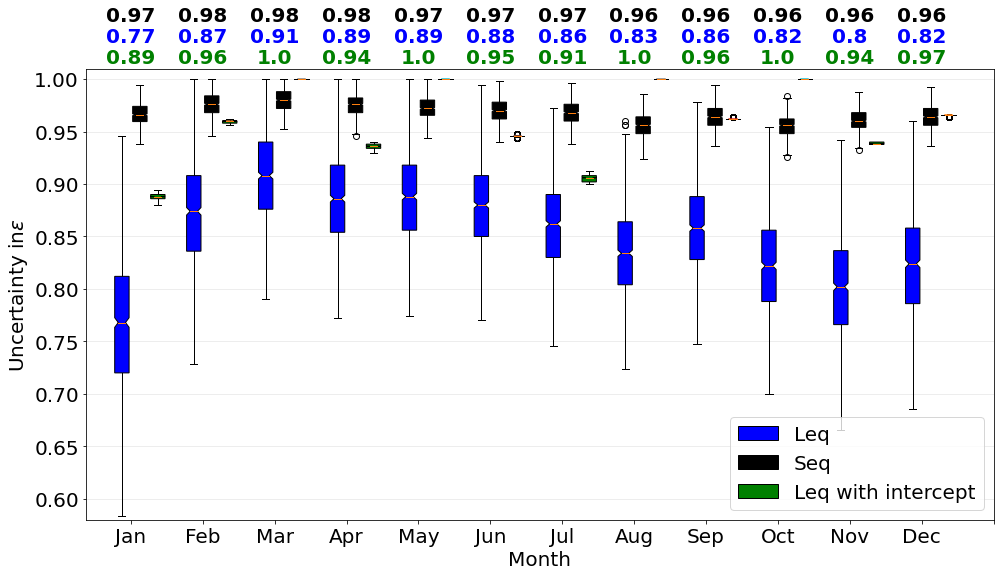

In [66]:
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.boxplot([opteps_1.flatten(),opteps_2.flatten(),opteps_3.flatten(),opteps_4.flatten(),opteps_5.flatten(),
                 opteps_6.flatten(),opteps_7.flatten(),opteps_8.flatten(),opteps_9.flatten(),
                 opteps_10.flatten(),opteps_11.flatten(),opteps_12.flatten()],1,widths=0.2,patch_artist=True,
                positions=np.arange(0.5,12.50))
### box plot using short equation
box1=plt.boxplot([opteps1_1.flatten(),opteps1_2.flatten(),opteps1_3.flatten(),opteps1_4.flatten(),opteps1_5.flatten(),
                  opteps1_6.flatten(),opteps1_7.flatten(),opteps1_8.flatten(),opteps1_9.flatten(),opteps1_10.flatten(),
                  opteps1_11.flatten(),opteps1_12.flatten()]
                 ,1,widths=0.2,patch_artist=True,
                 positions=np.arange(0.75,12.75))

box2=plt.boxplot([opteps_1_int.flatten(),opteps_2_int.flatten(),opteps_3_int.flatten(),opteps_4_int.flatten(),opteps_5_int.flatten(),
                 opteps_6_int.flatten(),opteps_7_int.flatten(),opteps_8_int.flatten(),opteps_9_int.flatten(),
                 opteps_10_int.flatten(),opteps_11_int.flatten(),opteps_12_int.flatten()],1,widths=0.2,patch_artist=True,
                positions=np.arange(1,13))
               
               
               
               
plt.setp(box["boxes"], facecolor='blue')
plt.setp(box1["boxes"], facecolor='black')
plt.setp(box2["boxes"], facecolor='green')

#line1,=plt.plot(np.arange(0.5,12.5),list_opt_epsref1, color='r', label='optimum epsilon using Leq',zorder=10)
#line2,=plt.plot(np.arange(0.75,12.75),list_opt_epsign1, color='g', label='optimum epsilon using Seq',zorder=10)

plt.legend([box["boxes"][0],box1["boxes"][0],box2["boxes"][0]],["Leq", "Seq","Leq with intercept"],
           loc="lower right", fontsize=20)    

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_ylabel('Uncertainty in' +'$\epsilon$', ha='center',fontsize=20)
ax1.set_xlabel('Month', ha='center',fontsize=20)
numBoxes=12
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
medians2=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]    #short equation
    med1 = box1['medians'][i]   #long equation
    med2= box2['medians'][i]   #long equation wit intercept
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    medianX2 = []
    medianY2 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        medianX2.append(med2.get_xdata()[j])
        medianY2.append(med2.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        plt.plot(medianX2, medianY2)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        medians2[i] = medianY2[0]
        

ax1.set_xlim(0, numBoxes)
top = 1.01
bottom = 0.58
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=20)

plt.xticks(np.arange(0.625,13.625), ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),fontsize=20)

pos = np.arange(0.625,13.625)#np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
upperLabels2 = [str(np.round(s2, 2)) for s2 in medians2]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top +0.025, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='b',fontsize=20)
    ax1.text(pos[tick], top + 0.045, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='black',fontsize=20)
    ax1.text(pos[tick], top + 0.005, upperLabels2[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='green',fontsize=20)
plt.grid(axis='y')
fname = 'opteps_boxplt_threebox'
#plt.plot(np.arange(0.25,5.25),y2,'*')
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



        
        
        
          


        
        

**Considering intercept reduces the uncertainity in emissivity**

## 2017/10 opt eps is extreme end of boxplot ?

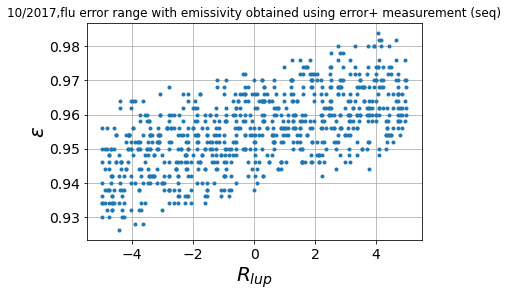

In [49]:
x=flux_unc_seq.unc_flu[7200:8000]
y=flux_unc_seq.eps[7200:8000]
plt.plot(x,y,'.')
plt.xlabel('$R_{lup}$', ha='center',fontsize=20)
plt.ylabel('$\epsilon$', labelpad=10, va='center',fontsize=20)
plottitle = ('10/2017,flu error range with emissivity obtained using error+ measurement (seq)')
plt.title(plottitle)
plt.grid()
plt.show()

In [50]:
df_all=HWframe.copy()
df_err=df_err_seq.copy()
dt_uncconst_seq=[]
hr_range=np.arange(8,17,1)
epsilon1=0.972

jj=0  
#for ii in range(9):
    df = df_all[(df_all.index.year == 2017)&(df_all.index.month == 10) 
            & (df_all.Fn > 25) & (df_all.Ws > 2)&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
            &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    # &(df_all.index.day == 15)&(df_all.index.hour == hr_range[ii])&(df_all.index.minute == 0)
    
   
    for j in range(800) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                        
        
        
        list_H=df.Fh+df_err.unc_h[k1+j]
        df = df.assign(H=list_H)
        #Fld=df.Fld+unc_Fld
        Flu=df.Flu+df_err.unc_flu[k1+j]
        list_T_s1 = tf_T_s1(Flu)
        
        df = df.assign(T_s1=list_T_s1)
        list_DT1 = df.T_s1 - (df.T_a+df_err.unc_ta[k1+j])
        df = df.assign(DT1=list_DT1)        
        dt_uncconst_seq.append(list_DT1)
    

IndentationError: unexpected indent (<ipython-input-50-c637de686f1b>, line 9)

### epsilon ucertainity for 1 year:

In [51]:
df=opteps_flux_error.copy()
max_eps=[]
min_eps=[]
mean_eps=[]
for i in np.arange(1,13):
    df_plot=df[(df.month == i)]
    max_eps.append(max(df_plot.eps))
    min_eps.append(min(df_plot.eps))
    mean_eps.append(df_plot.eps.mean())
fig=plt.figure(figsize=(12,8))   
plt.plot(np.arange(1,13),list_opt_epsign1, color='red')
plt.plot(np.arange(1,13),max_eps, color='green')
plt.plot(np.arange(1,13), min_eps, color='blue')
plt.plot(np.arange(1,13), mean_eps,'*', color='k')
plt.legend(['opt epsilon','maximum epsilon', 'minimum epsilon', 'mean epsilon'])
plt.xticks(np.arange(1,13))
plt.xlabel(r'$Months$', ha='center',fontsize=20)
plt.ylabel(r'$\epsilon$', ha='center',fontsize=20)
#plt.title('$\epsilon$={0}'.format(np.round(epsilon1,decimals=2)))
plottitle = 'Alice spring uncertainity in emissivity using simplified equation for year 2017'
fname = 'as_seq_salib{0}'.format(str(np.round(2017)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
#plt.grid()

    
    


NameError: name 'opteps_flux_error' is not defined

### opts eps 3years:

## opt eps: Ignoring reflected

In [67]:
opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
def opteps_OLS_loop_1 (years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.7, epsmax=0.999, epsincr=0.002, eqdigits=3):
    
    
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        #list_T_s12 = tf_T_s12(df12.Flu)
        #df12 = df12.assign(T_s12=list_T_s12)
       # list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        
        ###########
        df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1)
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0]
        
       

In [68]:
opteps_OLS_loop_1 (2017,HWframe,10)

0.9540000000000002

In [69]:
def opteps_OLS_months (years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
        
    
        
    plt.xticks([-5,0,5,10,15])
    plt.xlim(0, 15)
    plt.ylim(0, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
        
        

41.33992429998015


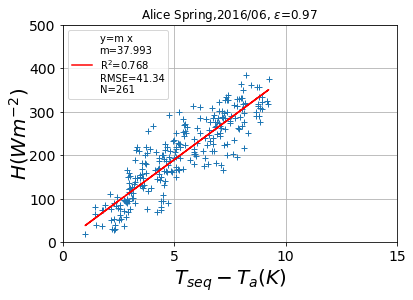

In [70]:
opteps_OLS_months( 2016,HWframe,6,0.970)

41.7930683267158


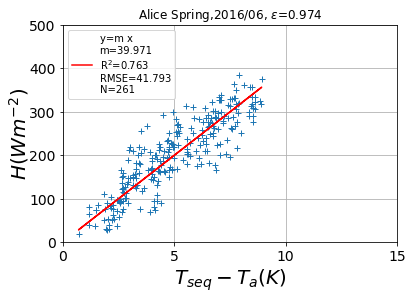

In [71]:
opteps_OLS_months( 2016,HWframe,6,0.974)

yr=2016
mnth=0
list_opt_epsign=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign.append(1)
    
const=np.mean(list_opt_epsign)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq$(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

52.15925358267775


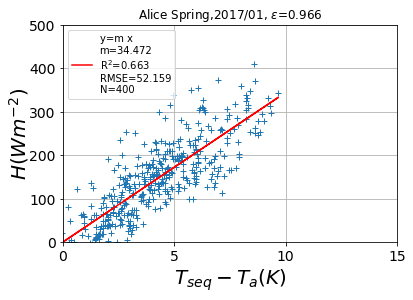

43.555687992572935


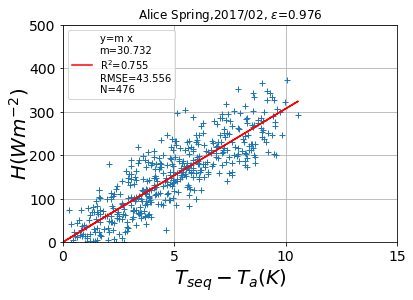

43.17475245945436


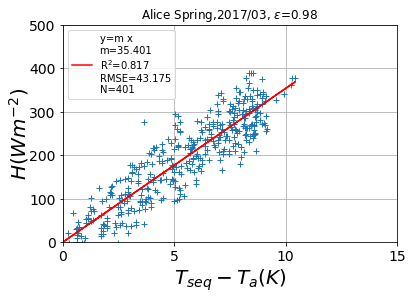

49.306395646445786


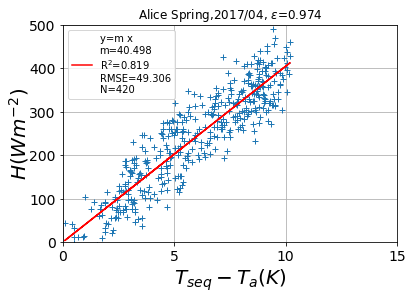

46.668056894140726


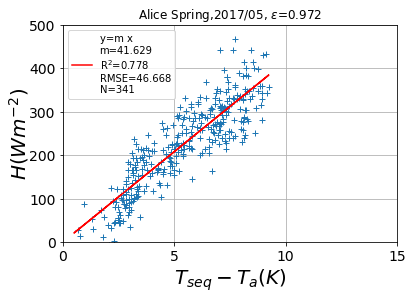

42.113240402757604


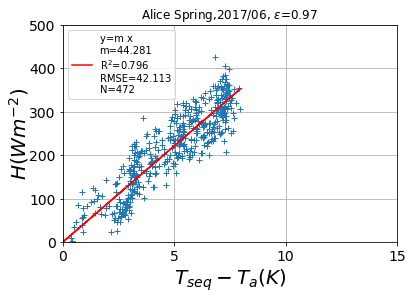

40.43504596543196


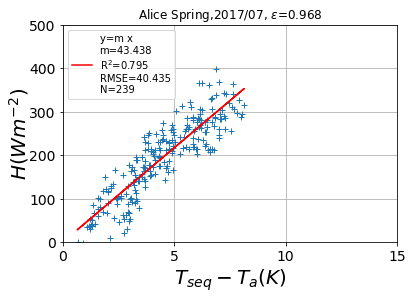

39.161366202288576


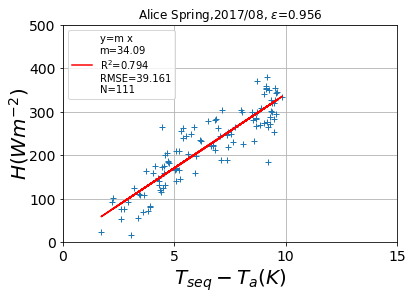

52.6202529499865


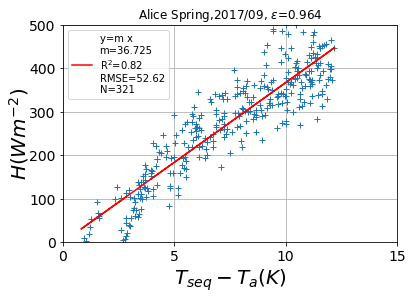

61.4153599858644


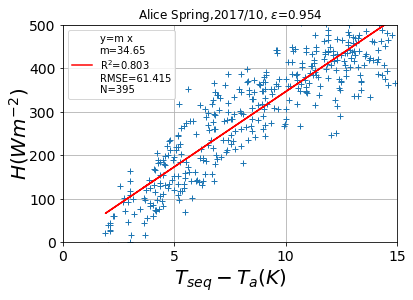

57.04497353177538


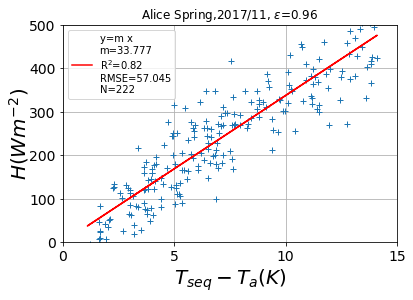

54.94343376308332


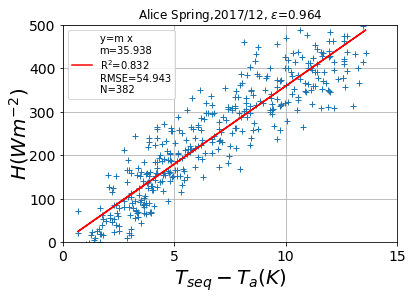

NameError: name 'eqdigits' is not defined

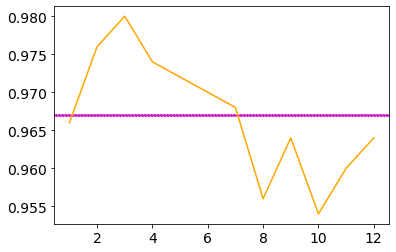

In [72]:
yr=2017
mnth=0
list_opt_epsign1=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign1.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign1.append(1)
    
const=np.mean(list_opt_epsign1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign1,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq$,(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

##  with opt and with uncertainty

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.canvas.set_window_title('temp bias boxplot')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


box=plt.boxplot([opteps_1.flatten(),opteps_2.flatten(),opteps_3.flatten(),opteps_4.flatten(),opteps_5.flatten(),
                 opteps_6.flatten(),opteps_7.flatten(),opteps_8.flatten(),opteps_9.flatten(),
                 opteps_10.flatten(),opteps_11.flatten(),opteps_12.flatten()],1,patch_artist=True,
                positions=np.arange(0.75,12.75))
### box plot using short equation
box1=plt.boxplot([opteps1_1.flatten(),opteps1_2.flatten(),opteps1_3.flatten(),opteps1_4.flatten(),opteps1_5.flatten(),
                  opteps1_6.flatten(),opteps1_7.flatten(),opteps1_8.flatten(),opteps1_9.flatten(),opteps1_10.flatten(),
                  opteps1_11.flatten(),opteps1_12.flatten()]
                 ,1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
               
               
               
               
plt.setp(box["boxes"], facecolor='blue')
plt.setp(box1["boxes"], facecolor='orange')
plt.legend([box["boxes"][0],box1["boxes"][0]],["opt $\epsilon$ range using leq", "opt $\epsilon$ range using seq"],
           loc="lower right") 

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)


ax1.set_axisbelow(True)
ax1.set_ylabel(r'$\epsilon$', ha='center',fontsize=20)

numBoxes=12
medians=list(range(numBoxes))
medians1=list(range(numBoxes))
for i in range(numBoxes):
    med = box['medians'][i]
    med1 = box1['medians'][i]
    medianX = []
    medianY = []
    medianX1 = []
    medianY1 = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        medianX1.append(med1.get_xdata()[j])
        medianY1.append(med1.get_ydata()[j])
        plt.plot(medianX, medianY)
        plt.plot(medianX1, medianY1)
        medians[i] = medianY[0]
        medians1[i] = medianY1[0]
        #medians[i] = medianx[0]
# Set the axes ranges and axes labels
#eps=[0.985,0.983,0.974,0.985,0.984]#,0.974,0.985,0.985,0.983,0.974]
ax1.set_xlim(0, numBoxes + 1)
top = 1
bottom = 0.6
ax1.set_ylim(bottom, top)
ax1.yaxis.set_tick_params(labelsize=14)
xtickNames = plt.setp(ax1, xticklabels=("9",
                                        "11","12","14","15"))
plt.setp(xtickNames, rotation=45, fontsize=12, fontweight='bold')


pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
upperLabels1 = [str(np.round(s1, 2)) for s1 in medians1]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - 0.4, upperLabels[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='b')
    ax1.text(pos[tick], top - 0.35, upperLabels1[tick],
             horizontalalignment='center', size='x-large', weight=weights[k],
             color='orange')
    #ax1.text(pos[tick], bottom + 4, eps[tick],
            # horizontalalignment='center', size='x-large', weight=weights[k],
             #color='k')

fname = 'opteps_boxplt1'
plt.plot(np.arange(1,13),list_opt_epsref1, color='red')
plt.plot(np.arange(1,13),list_opt_epsign1, color='green')
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
#plt.plot(np.arange(0.75,5.75),y2,'*')
plt.show()



        
        